https://www.machinehack.com/course/predict-the-flight-ticket-price-hackathon/
## Predict The Flight Ticket Price Hackathon

Flight ticket prices can be something hard to guess, today we might see a price, check out the price of the same flight tomorrow, it will be a different story. We might have often heard travellers saying that flight ticket prices are so unpredictable. Huh! Here we take on the challenge! As data scientists, we are gonna prove that given the right data anything can be predicted. Here you will be provided with prices of flight tickets for various airlines between the months of March and June of 2019 and between various cities.

In [9]:
import nltk
import sklearn
import pandas
import numpy
import matplotlib.pyplot
import seaborn
print('The nltk version is {}.'.format(nltk.__version__))
print('The scikit-learn version is {}.'.format(sklearn.__version__))
print('The pandas version is {}.'.format(pandas.__version__))
print('The numpy version is {}.'.format(numpy.__version__))
print('The matplotlib version is {}.'.format(matplotlib.__version__))
print('The seaborn version is {}.'.format(seaborn.__version__))

The nltk version is 3.4.5.
The scikit-learn version is 0.23.2.
The pandas version is 1.0.5.
The numpy version is 1.17.2.
The matplotlib version is 3.2.2.
The seaborn version is 0.9.0.


/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [10]:
conda --version

conda 4.8.3

Note: you may need to restart the kernel to use updated packages.


In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [104]:
import seaborn as sns

In [105]:
train_df=pd.read_excel('Data_Train.xlsx')
test_df=pd.read_excel('Test_set.xlsx')

In [106]:
print(train_df.shape)
print(test_df.shape)

(10683, 11)
(2671, 10)


In [107]:
train_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [108]:
test_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [109]:
big_df=train_df.append(test_df)

In [110]:
big_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0


In [111]:
big_df.dtypes

Airline             object
Date_of_Journey     object
Source              object
Destination         object
Route               object
Dep_Time            object
Arrival_Time        object
Duration            object
Total_Stops         object
Additional_Info     object
Price              float64
dtype: object

# Feature Engineering 

In [112]:
big_df.isnull().sum()

Airline               0
Date_of_Journey       0
Source                0
Destination           0
Route                 1
Dep_Time              0
Arrival_Time          0
Duration              0
Total_Stops           1
Additional_Info       0
Price              2671
dtype: int64

# Date_of_Journey

In [113]:
big_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0


In [114]:
big_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0


In [115]:
big_df['Date']=big_df['Date_of_Journey'].str.split('/').str[0]

In [116]:
big_df['Month']=big_df['Date_of_Journey'].str.split('/').str[1]

In [117]:
big_df['Year']=big_df['Date_of_Journey'].str.split('/').str[2]

In [118]:
big_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,24,03,2019
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,05,2019
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0,9,06,2019
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,05,2019
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,01,03,2019


In [119]:
big_df.drop('Date_of_Journey',axis=1,inplace=True)

In [120]:
big_df.head(2)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,24,03,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,05,2019


In [121]:
big_df.dtypes

Airline             object
Source              object
Destination         object
Route               object
Dep_Time            object
Arrival_Time        object
Duration            object
Total_Stops         object
Additional_Info     object
Price              float64
Date                object
Month               object
Year                object
dtype: object

In [122]:
big_df['Year']=big_df['Year'].astype(int)

In [123]:
big_df['Month']=big_df['Month'].astype(int)

In [124]:
big_df['Date']=big_df['Date'].astype(int)

In [125]:
big_df.dtypes

Airline             object
Source              object
Destination         object
Route               object
Dep_Time            object
Arrival_Time        object
Duration            object
Total_Stops         object
Additional_Info     object
Price              float64
Date                 int64
Month                int64
Year                 int64
dtype: object

# Arrival_Time

In [126]:
big_df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,5,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0,9,6,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,5,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,1,3,2019


In [127]:
big_df['Arrival_Time']=big_df['Arrival_Time'].str.split(" ").str[0]

In [128]:
big_df.head(2)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,non-stop,No info,3897.0,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,5,2019


# Total_Stops

In [129]:
big_df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,non-stop,No info,3897.0,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,5,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25,19h,2 stops,No info,13882.0,9,6,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,5,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,1,3,2019


In [130]:
big_df['Total_Stops'].value_counts(dropna=False)

1 stop      7056
non-stop    4340
2 stops     1899
3 stops       56
4 stops        2
NaN            1
Name: Total_Stops, dtype: int64

In [131]:
big_df[big_df['Total_Stops'].isnull()]

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
9039,Air India,Delhi,Cochin,NaN,09:45,09:25,23h 40m,NaN,No info,7480.0,6,5,2019


In [132]:
big_df['Total_Stops']=big_df['Total_Stops'].fillna('1 stop')

In [133]:
big_df.iloc[9039:9041]

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
9039,Air India,Delhi,Cochin,NaN,09:45,09:25,23h 40m,1 stop,No info,7480.0,6,5,2019
9040,Air India,Delhi,Cochin,DEL → LKO → BOM → COK,12:20,19:15,30h 55m,2 stops,No info,10703.0,21,3,2019


In [134]:
big_df['Total_Stops']=np.where(big_df['Total_Stops']=='non-stop','0 stop',big_df['Total_Stops'])
#big_df['Total_Stops']=big_df['Total_Stops'].str.replace('non-stop','0')

In [135]:
big_df['Total_Stops'].value_counts()

1 stop     7057
0 stop     4340
2 stops    1899
3 stops      56
4 stops       2
Name: Total_Stops, dtype: int64

In [136]:
big_df['Total_Stops']=big_df['Total_Stops'].str.split(' ').str[0]

In [137]:
big_df.head(2)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,0,No info,3897.0,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2,No info,7662.0,1,5,2019


In [138]:
big_df['Total_Stops']=big_df.Total_Stops.astype(int)

In [139]:
big_df.dtypes

Airline             object
Source              object
Destination         object
Route               object
Dep_Time            object
Arrival_Time        object
Duration            object
Total_Stops          int64
Additional_Info     object
Price              float64
Date                 int64
Month                int64
Year                 int64
dtype: object

In [140]:
big_df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,0,No info,3897.0,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2,No info,7662.0,1,5,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25,19h,2,No info,13882.0,9,6,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1,No info,6218.0,12,5,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1,No info,13302.0,1,3,2019


# Additional_Info

In [141]:
big_df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,0,No info,3897.0,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2,No info,7662.0,1,5,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25,19h,2,No info,13882.0,9,6,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1,No info,6218.0,12,5,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1,No info,13302.0,1,3,2019


In [142]:
big_df['Additional_Info'].value_counts()

No info                         10493
In-flight meal not included      2426
No check-in baggage included      396
1 Long layover                     20
Change airports                     8
Business class                      5
No Info                             3
1 Short layover                     1
2 Long layover                      1
Red-eye flight                      1
Name: Additional_Info, dtype: int64

In [143]:
big_df['Additional_Info']=np.where(big_df['Additional_Info']=='No Info','No info',big_df['Additional_Info'])
#big_df['Additional_Info'=big_df['Additional_Info'].str.replace('No Info','No info')

In [144]:
big_df['Additional_Info'].value_counts()

No info                         10496
In-flight meal not included      2426
No check-in baggage included      396
1 Long layover                     20
Change airports                     8
Business class                      5
1 Short layover                     1
2 Long layover                      1
Red-eye flight                      1
Name: Additional_Info, dtype: int64

# Departure_Time

In [145]:
big_df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,0,No info,3897.0,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2,No info,7662.0,1,5,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25,19h,2,No info,13882.0,9,6,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1,No info,6218.0,12,5,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1,No info,13302.0,1,3,2019


In [146]:
big_df['Departure_Hour']=big_df['Dep_Time'].str.split(':').str[0]

In [147]:
big_df['Departure_Minute']=big_df['Dep_Time'].str.split(':').str[1]

In [148]:
big_df['Departure_Hour']=big_df['Departure_Hour'].astype(int)
big_df['Departure_Minute']=big_df['Departure_Minute'].astype(int)

In [149]:
big_df.head(2)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Departure_Hour,Departure_Minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,0,No info,3897.0,24,3,2019,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2,No info,7662.0,1,5,2019,5,50


In [150]:
big_df.drop('Dep_Time',axis=1,inplace=True)

# Arrival_Time

In [151]:
big_df.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Departure_Hour,Departure_Minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10,2h 50m,0,No info,3897.0,24,3,2019,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2,No info,7662.0,1,5,2019,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25,19h,2,No info,13882.0,9,6,2019,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1,No info,6218.0,12,5,2019,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1,No info,13302.0,1,3,2019,16,50


In [152]:
big_df['Arrival_Hour']=big_df['Arrival_Time'].str.split(':').str[0]

In [153]:
big_df['Arrival_Minute']=big_df['Arrival_Time'].str.split(':').str[1]

In [154]:
big_df['Arrival_Hour']=big_df['Arrival_Hour'].astype(int)
big_df['Arrival_Minute']=big_df['Arrival_Minute'].astype(int)

In [155]:
big_df.head(2)

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Departure_Hour,Departure_Minute,Arrival_Hour,Arrival_Minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10,2h 50m,0,No info,3897.0,24,3,2019,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2,No info,7662.0,1,5,2019,5,50,13,15


In [156]:
big_df.drop('Arrival_Time',axis=1,inplace=True)

# Route

In [157]:
big_df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Departure_Hour,Departure_Minute,Arrival_Hour,Arrival_Minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,0,No info,3897.0,24,3,2019,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2,No info,7662.0,1,5,2019,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2,No info,13882.0,9,6,2019,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1,No info,6218.0,12,5,2019,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1,No info,13302.0,1,3,2019,16,50,21,35


In [158]:
big_df['Route1']=big_df['Route'].str.split('→ ').str[0]

In [159]:
big_df['Route2']=big_df['Route'].str.split('→ ').str[1]

In [160]:
big_df['Route3']=big_df['Route'].str.split('→ ').str[2]

In [161]:
big_df['Route4']=big_df['Route'].str.split('→ ').str[3]

In [162]:
big_df['Route5']=big_df['Route'].str.split('→ ').str[4]

In [163]:
big_df['Route6']=big_df['Route'].str.split('→ ').str[5]

In [164]:
big_df['Route7']=big_df['Route'].str.split('→ ').str[6]

In [165]:
big_df.head(3)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,...,Departure_Minute,Arrival_Hour,Arrival_Minute,Route1,Route2,Route3,Route4,Route5,Route6,Route7
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,0,No info,3897.0,24,3,...,20,1,10,BLR,DEL,NaN,NaN,NaN,NaN,NaN
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2,No info,7662.0,1,5,...,50,13,15,CCU,IXR,BBI,BLR,NaN,NaN,NaN
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2,No info,13882.0,9,6,...,25,4,25,DEL,LKO,BOM,COK,NaN,NaN,NaN


In [166]:
big_df.drop('Route',axis=1,inplace=True)

In [167]:
big_df.head()

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,...,Departure_Minute,Arrival_Hour,Arrival_Minute,Route1,Route2,Route3,Route4,Route5,Route6,Route7
0,IndiGo,Banglore,New Delhi,2h 50m,0,No info,3897.0,24,3,2019,...,20,1,10,BLR,DEL,NaN,NaN,NaN,NaN,NaN
1,Air India,Kolkata,Banglore,7h 25m,2,No info,7662.0,1,5,2019,...,50,13,15,CCU,IXR,BBI,BLR,NaN,NaN,NaN
2,Jet Airways,Delhi,Cochin,19h,2,No info,13882.0,9,6,2019,...,25,4,25,DEL,LKO,BOM,COK,NaN,NaN,NaN
3,IndiGo,Kolkata,Banglore,5h 25m,1,No info,6218.0,12,5,2019,...,5,23,30,CCU,NAG,BLR,NaN,NaN,NaN,NaN
4,IndiGo,Banglore,New Delhi,4h 45m,1,No info,13302.0,1,3,2019,...,50,21,35,BLR,NAG,DEL,NaN,NaN,NaN,NaN


In [168]:
big_df['Route5'].value_counts()

COK     31
BLR     15
DEL      8
VGA      2
HYD      2
Name: Route5, dtype: int64

In [169]:
big_df['Route6'].value_counts()

DEL    2
Name: Route6, dtype: int64

In [170]:
big_df.drop('Route6',axis=1,inplace=True)

In [171]:
big_df['Route7'].value_counts(dropna=False)

NaN    13354
Name: Route7, dtype: int64

In [172]:
big_df.drop('Route7',axis=1,inplace=True)

In [173]:
big_df.head()

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Departure_Hour,Departure_Minute,Arrival_Hour,Arrival_Minute,Route1,Route2,Route3,Route4,Route5
0,IndiGo,Banglore,New Delhi,2h 50m,0,No info,3897.0,24,3,2019,22,20,1,10,BLR,DEL,NaN,NaN,NaN
1,Air India,Kolkata,Banglore,7h 25m,2,No info,7662.0,1,5,2019,5,50,13,15,CCU,IXR,BBI,BLR,NaN
2,Jet Airways,Delhi,Cochin,19h,2,No info,13882.0,9,6,2019,9,25,4,25,DEL,LKO,BOM,COK,NaN
3,IndiGo,Kolkata,Banglore,5h 25m,1,No info,6218.0,12,5,2019,18,5,23,30,CCU,NAG,BLR,NaN,NaN
4,IndiGo,Banglore,New Delhi,4h 45m,1,No info,13302.0,1,3,2019,16,50,21,35,BLR,NAG,DEL,NaN,NaN


In [174]:
big_df['Route1']=big_df['Route1'].fillna('None')

In [175]:
big_df.Route2.value_counts().head()

BOM     4890
DEL     1941
BLR      896
DEL      822
HYD      785
Name: Route2, dtype: int64

In [176]:
big_df['Route2']=big_df['Route2'].fillna('None')

In [177]:
big_df.Route2.value_counts().head()

BOM     4890
DEL     1941
BLR      896
DEL      822
HYD      785
Name: Route2, dtype: int64

In [178]:
big_df['Route3']=big_df['Route3'].fillna('None')

In [179]:
big_df['Route3'].value_counts().head()

None    4341
COK     4015
BLR     2280
BOM     1345
DEL      703
Name: Route3, dtype: int64

In [180]:
big_df['Route4']=big_df['Route4'].fillna('None')

In [181]:
big_df['Route4'].value_counts()

None    11397
COK      1373
BLR       390
DEL        98
HYD        38
BOM        33
DEL         9
TRV         5
HYD         4
GWL         3
NAG         1
AMD         1
BBI         1
BHO         1
Name: Route4, dtype: int64

In [182]:
big_df['Route5']=big_df['Route5'].fillna('None')

In [183]:
big_df['Route5'].value_counts()

None    13296
COK        31
BLR        15
DEL         8
VGA         2
HYD         2
Name: Route5, dtype: int64

In [184]:
big_df.head()

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Departure_Hour,Departure_Minute,Arrival_Hour,Arrival_Minute,Route1,Route2,Route3,Route4,Route5
0,IndiGo,Banglore,New Delhi,2h 50m,0,No info,3897.0,24,3,2019,22,20,1,10,BLR,DEL,None,None,None
1,Air India,Kolkata,Banglore,7h 25m,2,No info,7662.0,1,5,2019,5,50,13,15,CCU,IXR,BBI,BLR,None
2,Jet Airways,Delhi,Cochin,19h,2,No info,13882.0,9,6,2019,9,25,4,25,DEL,LKO,BOM,COK,None
3,IndiGo,Kolkata,Banglore,5h 25m,1,No info,6218.0,12,5,2019,18,5,23,30,CCU,NAG,BLR,None,None
4,IndiGo,Banglore,New Delhi,4h 45m,1,No info,13302.0,1,3,2019,16,50,21,35,BLR,NAG,DEL,None,None


# Duration

In [185]:
big_df.drop(['Duration'],axis=1,inplace=True)

In [186]:
big_df.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Year,Departure_Hour,Departure_Minute,Arrival_Hour,Arrival_Minute,Route1,Route2,Route3,Route4,Route5
0,IndiGo,Banglore,New Delhi,0,No info,3897.0,24,3,2019,22,20,1,10,BLR,DEL,None,None,None
1,Air India,Kolkata,Banglore,2,No info,7662.0,1,5,2019,5,50,13,15,CCU,IXR,BBI,BLR,None
2,Jet Airways,Delhi,Cochin,2,No info,13882.0,9,6,2019,9,25,4,25,DEL,LKO,BOM,COK,None
3,IndiGo,Kolkata,Banglore,1,No info,6218.0,12,5,2019,18,5,23,30,CCU,NAG,BLR,None,None
4,IndiGo,Banglore,New Delhi,1,No info,13302.0,1,3,2019,16,50,21,35,BLR,NAG,DEL,None,None


# Price

In [187]:
big_df.isnull().sum()

Airline                0
Source                 0
Destination            0
Total_Stops            0
Additional_Info        0
Price               2671
Date                   0
Month                  0
Year                   0
Departure_Hour         0
Departure_Minute       0
Arrival_Hour           0
Arrival_Minute         0
Route1                 0
Route2                 0
Route3                 0
Route4                 0
Route5                 0
dtype: int64

In [188]:
big_df['Price'].fillna((big_df['Price'].mean()),inplace=True)

In [189]:
big_df['Price']=big_df['Price'].round()

In [190]:
big_df.isnull().sum()

Airline             0
Source              0
Destination         0
Total_Stops         0
Additional_Info     0
Price               0
Date                0
Month               0
Year                0
Departure_Hour      0
Departure_Minute    0
Arrival_Hour        0
Arrival_Minute      0
Route1              0
Route2              0
Route3              0
Route4              0
Route5              0
dtype: int64

# LabelEncoder

In [191]:
big_df.dtypes

Airline              object
Source               object
Destination          object
Total_Stops           int64
Additional_Info      object
Price               float64
Date                  int64
Month                 int64
Year                  int64
Departure_Hour        int64
Departure_Minute      int64
Arrival_Hour          int64
Arrival_Minute        int64
Route1               object
Route2               object
Route3               object
Route4               object
Route5               object
dtype: object

In [192]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
big_df["Airline"]=encoder.fit_transform(big_df['Airline'])
big_df["Source"]=encoder.fit_transform(big_df['Source'])
big_df["Destination"]=encoder.fit_transform(big_df['Destination'])
big_df["Additional_Info"]=encoder.fit_transform(big_df['Additional_Info'])
big_df["Route1"]=encoder.fit_transform(big_df['Route1'])
big_df["Route2"]=encoder.fit_transform(big_df['Route2'])
big_df["Route3"]=encoder.fit_transform(big_df['Route3'])
big_df["Route4"]=encoder.fit_transform(big_df['Route4'])
big_df["Route5"]=encoder.fit_transform(big_df['Route5'])

In [193]:
big_df

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Year,Departure_Hour,Departure_Minute,Arrival_Hour,Arrival_Minute,Route1,Route2,Route3,Route4,Route5
0,3,0,5,0,7,3897.0,24,3,2019,22,20,1,10,0,13,24,12,4
1,1,3,0,2,7,7662.0,1,5,2019,5,50,13,15,2,25,1,3,4
2,4,2,1,2,7,13882.0,9,6,2019,9,25,4,25,3,32,4,5,4
3,3,3,0,1,7,6218.0,12,5,2019,18,5,23,30,2,34,3,12,4
4,3,0,5,1,7,13302.0,1,3,2019,16,50,21,35,0,34,8,12,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,1,3,0,1,7,9087.0,6,6,2019,20,30,20,25,2,14,3,12,4
2667,3,3,0,0,7,9087.0,27,3,2019,14,20,16,55,2,5,24,12,4
2668,4,2,1,1,7,9087.0,6,3,2019,21,50,4,25,3,7,6,12,4
2669,1,2,1,1,7,9087.0,6,3,2019,4,0,19,15,3,7,6,12,4


# Feature Selection

In [194]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

In [195]:
df_train=big_df[0:10683]
df_test=big_df[10683:]

In [196]:
X=df_train.drop(['Price'],axis=1)
y=df_train.Price

In [197]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [198]:
X_train.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Date,Month,Year,Departure_Hour,Departure_Minute,Arrival_Hour,Arrival_Minute,Route1,Route2,Route3,Route4,Route5
7106,8,0,2,0,7,6,4,2019,5,55,8,35,0,13,24,12,4
7904,1,2,1,1,7,1,6,2019,5,15,6,50,3,41,6,12,4
4861,4,2,1,2,5,12,6,2019,14,35,12,35,3,34,4,5,4
9375,3,2,1,1,7,15,6,2019,6,40,21,0,3,7,6,12,4
155,1,3,0,2,7,9,5,2019,8,20,7,55,2,28,4,3,4


In [199]:
model=SelectFromModel(Lasso(alpha=0.005,random_state=0))

In [200]:
model.fit(X_train,y_train)

SelectFromModel(estimator=Lasso(alpha=0.005, random_state=0))

In [201]:
model.get_support()

array([ True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True])

In [202]:
X_train['Year'].value_counts()

2019    7478
Name: Year, dtype: int64

In [203]:
selected_features=X_train.columns[(model.get_support())]

In [204]:
selected_features

Index(['Airline', 'Source', 'Destination', 'Total_Stops', 'Additional_Info',
       'Date', 'Month', 'Departure_Hour', 'Departure_Minute', 'Arrival_Hour',
       'Arrival_Minute', 'Route1', 'Route2', 'Route3', 'Route4', 'Route5'],
      dtype='object')

In [205]:
X_train=X_train.drop(['Year'],axis=1)

In [206]:
X_test=X_test.drop(['Year'],axis=1)

In [207]:
from sklearn.model_selection import RandomizedSearchCV
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [208]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [209]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

In [210]:
# Random search of parameters, using 3 fold cross validation, 
# search across 50 different combinations
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', 
                               n_iter = 50, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [211]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5, total=   1.1s
[CV] n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.1s remaining:    0.0s


[CV]  n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5, total=   1.1s
[CV] n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5 
[CV]  n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5, total=   1.1s
[CV] n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5 
[CV]  n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5, total=   1.1s
[CV] n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5 
[CV]  n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5, total=   1.1s
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=20 
[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=20, total=   2.5s
[CV] n_estimators=200, min_samples_spl

[CV]  n_estimators=1000, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=10, total=   3.5s
[CV] n_estimators=1000, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=10 
[CV]  n_estimators=1000, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=10, total=   3.6s
[CV] n_estimators=1000, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=10 
[CV]  n_estimators=1000, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=10, total=   3.6s
[CV] n_estimators=1000, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=10 
[CV]  n_estimators=1000, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=10, total=   3.5s
[CV] n_estimators=1000, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=10 
[CV]  n_estimators=1000, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=10, total=   3.5s
[CV] n_estimators=100, mi

[CV]  n_estimators=700, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=10, total=   6.6s
[CV] n_estimators=700, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=10 
[CV]  n_estimators=700, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=10, total=   6.7s
[CV] n_estimators=700, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=10 
[CV]  n_estimators=700, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=10, total=   6.7s
[CV] n_estimators=700, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=10 
[CV]  n_estimators=700, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=10, total=   6.7s
[CV] n_estimators=700, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=10 
[CV]  n_estimators=700, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=10, total=   6.7s
[CV] n_estimators=1200, min_samples_split=100, min_s

[CV]  n_estimators=1200, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=25, total=   4.6s
[CV] n_estimators=300, min_samples_split=15, min_samples_leaf=2, max_features=sqrt, max_depth=20 
[CV]  n_estimators=300, min_samples_split=15, min_samples_leaf=2, max_features=sqrt, max_depth=20, total=   1.3s
[CV] n_estimators=300, min_samples_split=15, min_samples_leaf=2, max_features=sqrt, max_depth=20 
[CV]  n_estimators=300, min_samples_split=15, min_samples_leaf=2, max_features=sqrt, max_depth=20, total=   1.3s
[CV] n_estimators=300, min_samples_split=15, min_samples_leaf=2, max_features=sqrt, max_depth=20 
[CV]  n_estimators=300, min_samples_split=15, min_samples_leaf=2, max_features=sqrt, max_depth=20, total=   1.3s
[CV] n_estimators=300, min_samples_split=15, min_samples_leaf=2, max_features=sqrt, max_depth=20 
[CV]  n_estimators=300, min_samples_split=15, min_samples_leaf=2, max_features=sqrt, max_depth=20, total=   1.3s
[CV] n_estimators=300, min_samples_split=

[CV]  n_estimators=500, min_samples_split=2, min_samples_leaf=5, max_features=auto, max_depth=20, total=   5.2s
[CV] n_estimators=500, min_samples_split=2, min_samples_leaf=5, max_features=auto, max_depth=20 
[CV]  n_estimators=500, min_samples_split=2, min_samples_leaf=5, max_features=auto, max_depth=20, total=   5.1s
[CV] n_estimators=900, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=25 
[CV]  n_estimators=900, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=25, total=   3.4s
[CV] n_estimators=900, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=25 
[CV]  n_estimators=900, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=25, total=   3.4s
[CV] n_estimators=900, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=25 
[CV]  n_estimators=900, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=25, total=   3.4s
[CV] n_estimators=900, min_samples_split

[CV]  n_estimators=1200, min_samples_split=2, min_samples_leaf=5, max_features=sqrt, max_depth=30, total=   5.3s
[CV] n_estimators=1200, min_samples_split=2, min_samples_leaf=5, max_features=sqrt, max_depth=30 
[CV]  n_estimators=1200, min_samples_split=2, min_samples_leaf=5, max_features=sqrt, max_depth=30, total=   5.2s
[CV] n_estimators=1200, min_samples_split=2, min_samples_leaf=5, max_features=sqrt, max_depth=30 
[CV]  n_estimators=1200, min_samples_split=2, min_samples_leaf=5, max_features=sqrt, max_depth=30, total=   5.2s
[CV] n_estimators=600, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=30 
[CV]  n_estimators=600, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=30, total=   2.8s
[CV] n_estimators=600, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=30 
[CV]  n_estimators=600, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=30, total=   2.8s
[CV] n_estimators=600, min_samples_split=10

[CV]  n_estimators=900, min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=5, total=   2.4s
[CV] n_estimators=900, min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=5 
[CV]  n_estimators=900, min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=5, total=   2.4s
[CV] n_estimators=900, min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=5 
[CV]  n_estimators=900, min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=5, total=   2.6s
[CV] n_estimators=900, min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=5 
[CV]  n_estimators=900, min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=5, total=   2.5s
[CV] n_estimators=900, min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=30 
[CV]  n_estimators=900, min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=30, total=   3.2s
[CV] n_estimators=900, min_samples_split=

[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed: 14.5min finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=50, n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [212]:
y_pred=rf_random.predict(X_test)

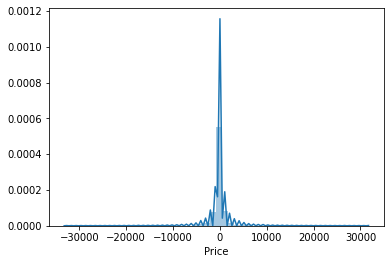

In [213]:
sns.distplot(y_test-y_pred)

In [218]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
print(accuracy_score(y_test, y_pred))
#print(classification_report(y_test, y_pred))
print("\n")
#print(confusion_matrix(y_test, y_pred))

ValueError: Classification metrics can't handle a mix of multiclass and continuous targets

In [224]:
accuracy = rf.score(y_test, y_pred)
#print(accuracy*100,'%')

NotFittedError: This RandomForestRegressor instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [222]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8740195248996422

# https://scikit-learn.org/stable/modules/classes.html#regression-metrics

# https://stackoverflow.com/questions/45627784/unable-to-obtain-accuracy-score-for-my-linear